In [1]:
# ei_net.ipynb
# This notebook is used for testing a network of excitatory and inhibitory units with homeostatic inhibition
# as described in: Moldakarimov, MacClelland and Ermentrout 2006, "A homeostatic rule for inhibitory synapses 
# promotes temporal sharpening and cortical reorganization" PNAS 103(44):16526-16531.

# By Sergio Verduzco Flores        July 2017

from sirasi import *
from matplotlib import pyplot as plt
import numpy as np
import pylab
import time

In [2]:
# create the functions with the gain functions for the E and I units
def make_fe(th, eps): # returns a function as in Eq. 1 of the paper
    return lambda x : np.sqrt( eps * np.log( 1. + np.exp( (x - th)/eps ) ) )
def make_fi(th, eps): # returns a function as in Eq. 2 of the paper
    return lambda x: eps * np.log( 1. + np.exp( (x - th)/eps ) ) 
def make_pulse(t_init, t_end): # return f(t) = 1 if t_init < t < t_end, 0 otherwise
    return lambda t : 1. if (t_init < t and t < t_end) else 0.

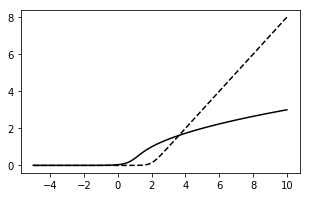

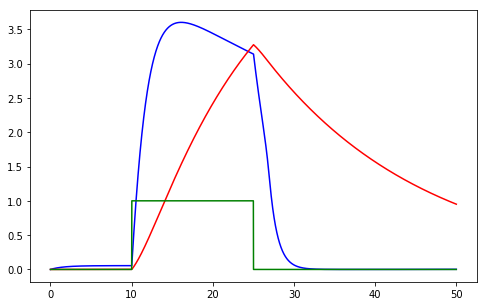

In [54]:
""" Test a single E-I pair, as in figure 2.
    It becomes clear that they may have used different durations for the transient stimulus.
    Moreover, the gain functins don't look the same, even if I match their parameters.
"""
net_params = {'min_delay' : 0.01, 'min_buff_size' : 2, 'rtol':1e-5, 'atol':1e-5 } 
net1 = network(net_params)
# creating the units
exc_params = {'tau' : 1., 'function' : make_fe(1., 0.2), 'type' : unit_types.custom_fi, 'init_val' : 0.0 }
inh_params = {'tau' : 20., 'function' : make_fi(2., 0.2), 'type' : unit_types.custom_fi, 'init_val' : 0.0 }
ext_params = {'init_val' : 0.0, 'function' : make_pulse(10., 25.), 'type' : unit_types.source, }

exc = net1.create(1, exc_params)
inh = net1.create(1, inh_params)
ext = net1.create(1, ext_params)

# connecting the units
exc2inh_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
exc2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
inh2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
ext2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}

exc2inh_syn = {'type' : synapse_types.static, 'init_w' : 1.}
exc2exc_syn = {'type' : synapse_types.static, 'init_w' : 3.}
inh2exc_syn = {'type' : synapse_types.static, 'init_w' : -1.2}
ext2exc_syn = {'type' : synapse_types.static, 'init_w' : 5.}

net1.connect(exc, inh, exc2inh_conn, exc2inh_syn)
net1.connect(exc, exc, exc2exc_conn, exc2exc_syn)
net1.connect(inh, exc, inh2exc_conn, inh2exc_syn)
net1.connect(ext, exc, ext2exc_conn, ext2exc_syn)
net1.connect(ext, inh, ext2exc_conn, ext2exc_syn)

# running the simulation
times, units, empty = net1.run(50.)

# visualizing
gain_fig = plt.figure(figsize=(5,3))
inps = np.linspace(-5.,10.,100)
exc_fr = np.array([net1.units[exc[0]].f(I) for I in inps])
inh_fr = np.array([net1.units[inh[0]].f(I) for I in inps])
pylab.plot(inps, exc_fr, 'k', inps, inh_fr, 'k--', figure=gain_fig)

act_fig = plt.figure(figsize=(8,5))
pylab.plot(times, units[exc[0]], 'b', times, units[inh[0]], 'r', times, units[ext[0]], 'g', figure=act_fig)
plt.show()


In [21]:
[ [syn.w for syn in syn_list] for syn_list in net1.syns ]

[[3.0, -1.2, 5.0], [1.0, 5.0], []]

In [56]:
a = [1,2,3,4]
b = [6,7,8,9]
c = zip(a,b)
list(c)

[(1, 6), (2, 7), (3, 8), (4, 9)]